<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/part2_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# chapter21. MNIST 손글씨 데이터 인식하기
# 사람의 손글씨를 인식한다는 것은 컴퓨터에게는 어려운 문제이므로, 역사적으로도 인공지능에서 큰 도전 과제였습니다.
# 이처럼 컴퓨터가 이미지의 내용을 명확히 분류하는 작업을 이미지 인식이라고 하는데, 역사적으로 어려운 과제로 인식되어오다가
# 최근에 와서 상당한 진전을 보였습니다. 물론 신경망이 이에 결정적인 역할을 했다는 사실을 부인할 수 없습니다.

**MNIST 데이터 모음: http://yann.lecun.com/exdb/mnist**

In [ ]:
# MNIST 데이터 베이스의 원래 포맷은 다루기에 쉽지 않기 때문에, 많은 사람이 사용자 편의를 위해 보다 편리한 포맷으로
# 변경한 자료들이 있습니다. 그중 하나는 http://pjreddie.com/projects/mnist-in-csv/

**MNIST 데이터 CSV모음: http://pjreddie.com/projects/mnist-in-csv/**

In [ ]:
# 학습데이터: http://www.pjreddie.com/media/files/mnist_train.csv
# 신경망의 학습에 이용될 수 있도록 레이블이 붙어 있는 60,000개의 데이터.
# 레이블이 붙어 있다는 말은 입력값과 함께 결과 값(정답)이 들어 있다는 의미

# 테스트데이터: http://www.pjreddie.com/media/files/mnist_test.csv
# 테스트 데이터는 우리의 아이디어나 아고리즘이 얼마나 잘 동작하는 지 확인하기 위해 사용됩니다.
# 테스트 데이터 역시 얼마나 잘 맞혔는 지를 확인하기 위한 용도로 정답 레이블이 함께 들어 있습니다.
# 10,000개 존재.

![스크린샷 2024-07-26 124902.png](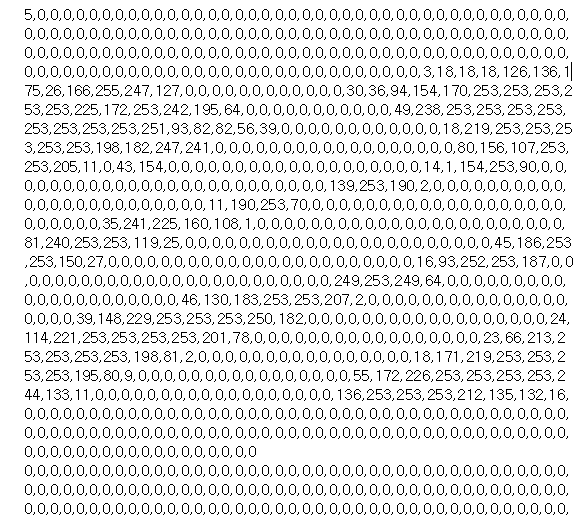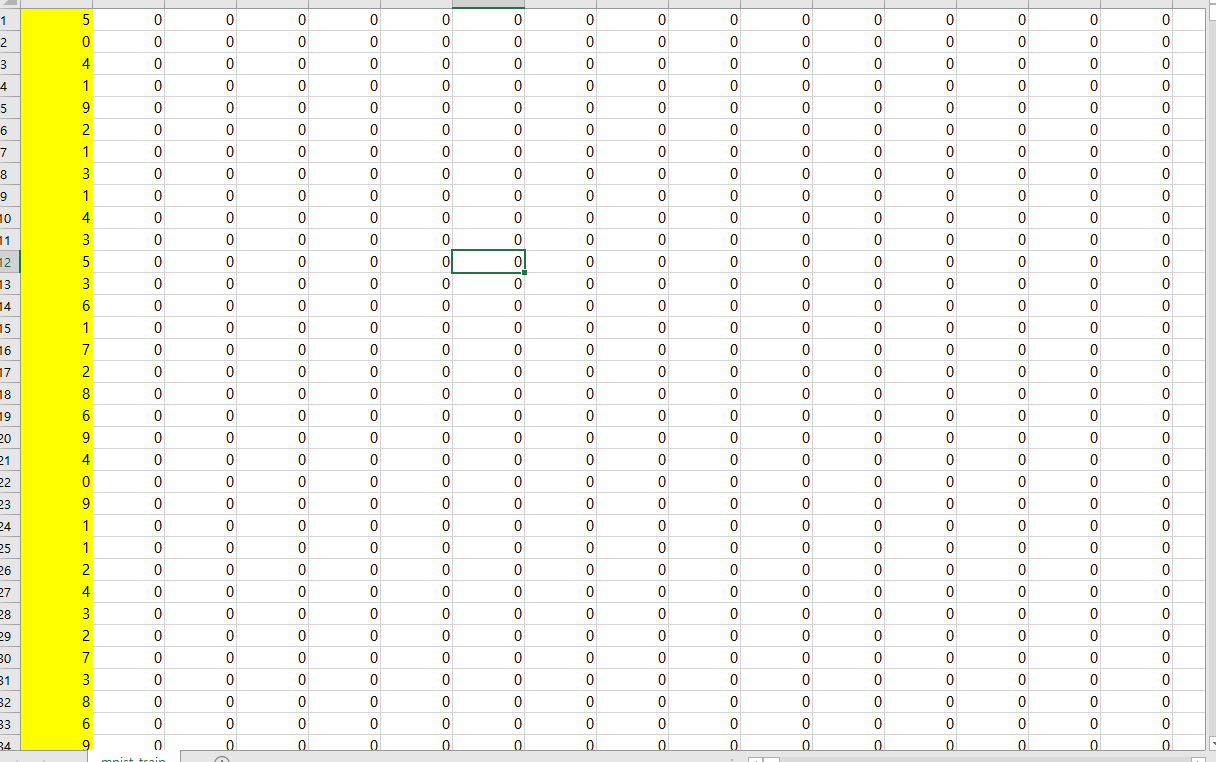)

In [ ]:
# 위의 그림처럼, 각 행은 숫자들로 구성되어 있으며, 각 숫자는 쉼표로 구분되어 있습니다.
# 각 행은 매우 길게 구성되어 있습니다. 텍스트 편집기에 따라 줄번호를 줄 수도 있습니다.

# 첫번째 값이 5이므로, 숫자 5를 쓴 이미지라는 것을 의미합니다. (레이블: label)
# 이미지에 있는 숫자의 값을 나타내고, 이 값이 바로 신경망이 학습을 통해 맞히고자 하는 정답.
# 이후 값들은 손으로 쓴 숫자 5라는 이미지에 대한 픽셀 값들입니다.

**100개 레코드를 가지는 MNIST 학습 데이터 모음: https://git.io/vySZ1**

**10개 레코드를 가지는 MNIST 테스트 데이터 모음: https://git.io/vySZP**

In [2]:
# 작업의 편의성을 위하 일단 작은 파일을 이용

# 구글 마운트
from google.colab import drive
drive.mount('/content/drvie')

Mounted at /content/drvie


In [4]:
import pandas as pd
test_10=pd.read_csv('/content/mnist_test_10.csv')
train_100=pd.read_csv('/content/mnist_train_100.csv')

In [5]:
train_100

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_file1=open('/content/mnist_train_100.csv','r')
data_list1=data_file1.readlines()
# readlines()함수: 전체 파일을 읽어 메모리에 올리므로, 이 함수를 사용하지 말라는 조언을 어디선가 들은 적이 있을지도 모르겠습니다.
# 한 번에 한 행씩만 읽어 필요한 작업을 완료하고 나서, 다음 행으로 이동하라는 조언.

# 전체 파일을 메모리에 올리고 작업하는 것보다는 한 행씩 올리고 작업하는 것이 훨씬 효율적인 방법입니다. 하지만 우리의 파일은 그 정도로
# 크지 않으며, readlines()를 이용하면 코드가 쉽기 때문에 일단은 이렇게 진행하게습니다.


data_file1.close()

print('data_list1값:',data_list1)

# 변수는 리스트로 이루어지며, 해당 파일의 각 행이 리스트의 하나의 원소가 됩니다.
# 이렇게 하면 일반적으로 리스트에서 특정 원소에 접근하는 것처럼 각 행에 접근할 수 있으므로 편리합니다.

data_list1값: ['5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,

In [17]:
data_list1[0]

# 1번째 숫자: 5(이미지의 레이블: 5)
# 나머지 784개의 숫자: 이미지를 구성하는 픽셀들의 색상 값.
# 0에서 255 사이의 숫자로 구성되어 있다: 색상

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [18]:
data_list1[1]
# 2번째 레코드 지칭.

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

In [19]:
len(data_list1) # 리스트의 길이가 100임을 확인했습니다.

100

In [20]:
# 785개의 숫자
# 1) 구분자로 쉼표를 이용해 긴 텍스트 문자열을 개별 값으로 분리
# 2) 레이블 값인 첫 번째 값은 무시하고, 나머지 28*28=784의 값을 추출한후, 28개의 행/열의 형태를 가지는 배열로 변환.
# 3) 이 배열을 시각화합니다.

**배열의 이용과 시각화를 도와줄 파이썬 확장 라이브러리**

In [22]:
import numpy
import matplotlib.pyplot
%matplotlib inline

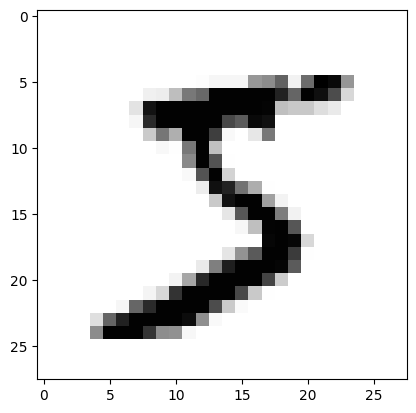

In [25]:
all_values=data_list1[0].split(',')
# split(','): 쉼표로 구분하여 분리합니다.

image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
# numpy.asfarray(): 문자열을 실수로 변환한 다음에 그 숫자로 구성된 배열 생성.

matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')
# imshow()함수: image_array의 시각

In [28]:
all_values[1:10]

# [1:] = 리스트의 원소 중 첫 번째 원소를 제외한 이후 나머지 모든 원소를 취합니다.

['0', '0', '0', '0', '0', '0', '0', '0', '0']

In [31]:
image_array[0:50]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

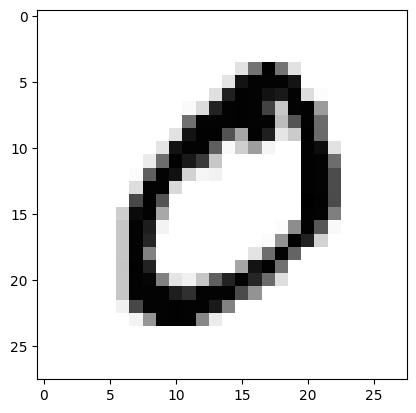

In [32]:
all_values=data_list1[1].split(',')
# split(','): 쉼표로 구분하여 분리합니다.

image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
# numpy.asfarray(): 문자열을 실수로 변환한 다음에 그 숫자로 구성된 배열 생성.

matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')
# imshow()함수: image_array의 시각

**MNIST 학습 데이터 준비하기**

In [33]:
# 0~255 사이에 속하는 입력 색상 값들의 범위를 0.01~1사이에 속하게 조정하는 것.
# 0~255 사이의 값을 가지는 입력 값들을 255로 나누면 0~1의 범위를 가지게 될 것입니다.
# 그리고 여기에 0.99를 곱하면 그 범위는 0~0.99가 되고, 여기에 0.01을 더함으로써 원하는 범위인
# 0.01~1을 얻을 수 있습니다.

scaled_input=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
print(scaled_input)

# MNIST 데이터의 값들의 범위를 재조정함으로써, 데이터를 신경망의 학습 단계와 질의 단계에 적용할 준비가 되었습니다.

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [ ]:
# 우리가 신경망에 바라는 점이 무엇인지 다시 한번 생각해봅시다.
# 우리가 바라는 바는 이미지를 분류해 정확한 레이블을 할당하는 것.

# 레이블은 0~9까지 10개 숫자 중 하나이고, 10개의 노드로 구성된 출력 계층이 필요하고, 각 노드는 가능한 결과 값, 즉 각 레이블에 해당할 것입니다.
# 만약 결과값이 0이라면 1번째 노드가 활성화되고, 나머지 노드들은 활성화되지 않을 것입니다.